<a href="https://colab.research.google.com/github/nishvit/DNN/blob/master/Asgnmnt_4_8th_dnn_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [16]:
transform = transforms.Compose ([transforms.ToTensor()])

trainset = MNIST (root = '/content/data/', train = True, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader (trainset, batch_size = 64, shuffle = True, num_workers = 2)

testset = MNIST (root = '/content/data/', train = False, download = True, transform = transform)
testloader = torch.utils.data.DataLoader (testset, batch_size = 64, shuffle = False, num_workers = 2)

classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [17]:
dataiter = iter (trainloader)
images, labels = dataiter.next ()
print (type (images))
print (images.shape)
print (labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


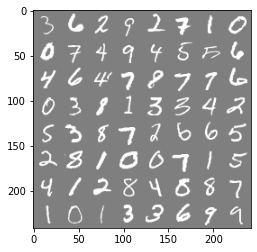

    3     6     2     9


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow (img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy ()
    plt.imshow (np.transpose (npimg, (1, 2, 0)))
    plt.show ()

# get some random training images
dataiter = iter (trainloader)
images, labels = dataiter.next ()

# show images
imshow (torchvision.utils.make_grid (images))
# print labels
print(' '.join ('%5s' % classes[labels[j]] for j in range (4)))

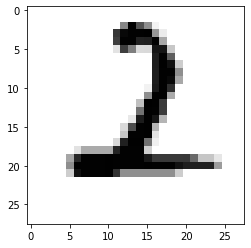

In [19]:
plt.imshow(images[4].numpy().squeeze(), cmap='gray_r');

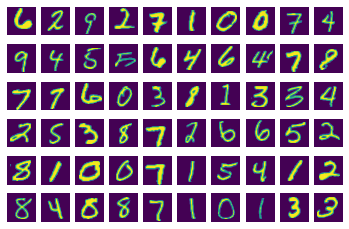

In [20]:
figure = plt.figure()
num_of_images = 60
for index in range (1, num_of_images + 1):
    plt.subplot (6, 10, index)
    plt.axis ('off')
    plt.imshow (images[index].numpy().squeeze())

In [21]:
import torch.nn as nn
import torch.nn.functional as F

class Net (nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d (in_channels = 1, out_channels = 16, kernel_size = 3, stride = 1, padding = 0) #26
        self.bn1=nn.BatchNorm2d (16)
        self.dropout1=nn.Dropout2d(p=0.1)

        self.conv2 = nn.Conv2d (in_channels = 16, out_channels = 32, kernel_size = 3, stride = 1, padding = 0)  #24
        self.bn2=nn.BatchNorm2d (32)
        self.dropout2=nn.Dropout2d(p=0.1)

        self.conv3 = nn.Conv2d (in_channels = 32, out_channels = 10, kernel_size = 1, stride = 1, padding = 0)  #22
        self.pool1 = nn.MaxPool2d (2, 2) # max pool 11
        
        self.conv4 = nn.Conv2d (in_channels = 10, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #9
        self.bn4=nn.BatchNorm2d (16)
        self.dropout4=nn.Dropout2d(p=0.1)

        self.conv5 = nn.Conv2d (in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #7
        self.bn5=nn.BatchNorm2d (16)
        self.dropout5=nn.Dropout2d(p=0.1)

        self.conv6 = nn.Conv2d (in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #5
        self.bn6=nn.BatchNorm2d (16)
        self.dropout6=nn.Dropout2d(p=0.1)

        self.conv7 = nn.Conv2d (in_channels = 16, out_channels = 16, kernel_size = 3, stride = 1, padding = 0)  #3
        self.bn7=nn.BatchNorm2d (16)
        self.dropout7=nn.Dropout2d(p=0.1)

        self.conv8 = nn.Conv2d (in_channels = 16, out_channels = 10, kernel_size = 4, stride = 1, padding = 0)  #
        self.bn8=nn.BatchNorm2d (10)
        self.dropout8=nn.Dropout2d(p=0.1)

        self.linear = nn.Linear (in_features = 10, out_features = 10)

    def forward (self, x):
        x = F.relu (self.dropout1(self.bn1(self.conv1 (x))))
        x = F.relu (self.dropout2(self.bn2(self.conv2 (x))))
        x = F.relu (self.pool1(self.conv3 (x)))
        x = F.relu (self.dropout4(self.bn4(self.conv4 (x))))
        x = F.relu (self.dropout5(self.bn5(self.conv5 (x))))
        x = F.relu (self.dropout6(self.bn6(self.conv6 (x))))
        x = F.relu (self.dropout7(self.bn7(self.conv7 (x))))
        x = F.relu (self.dropout8(self.bn8(self.conv8 (x))))
        #x = self.conv3 (x)

        x = x.reshape (-1, 10 * 1 * 1)
        x = self.linear (x)
        #x = F.softmax (x, dim = 0)
        return x

net = Net()

In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)
net.to (device)

cuda


Net(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout2d(p=0.1, inplace=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout2d(p=0.1, inplace=False)
  (conv3): Conv2d(32, 10, kernel_size=(1, 1), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(10, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout4): Dropout2d(p=0.1, inplace=False)
  (conv5): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn5): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout5): Dropout2d(p=0.1, inplace=False)
  (conv6): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1))
  (b

In [23]:
pytorch_total_params = sum(p.numel() for p in net.parameters())
print (pytorch_total_params)

16470


In [24]:
import time
import torch.optim as optim
from tqdm import notebook

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.001)
epochs = 10

tqdm_e = notebook.tqdm ([i + 1 for i in range (epochs)], total = epochs)
for i, e in enumerate (tqdm_e):
    time0 = time.time ()

    running_loss = 0
    print ('Training for Epoch ' + str (e) + '...')
    tqdm_tl = notebook.tqdm (trainloader, total = int (len (trainloader)))
    for images, labels in (tqdm_tl):
    #for images, labels in trainloader:
        # Training pass
        optimizer.zero_grad()
        
        output = net (images.cuda())
        loss = criterion (output, labels.cuda())
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()

    correct_count, all_count = 0, 0
    print ('Computing Accuracy on Training set...')
    tqdm_vl = notebook.tqdm (trainloader, total = int (len (trainloader)))
    for images, labels in tqdm_vl:
      true_label = labels.numpy()
      with torch.no_grad():
          logps = net (images.cuda())

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      for j in range (ps.shape[0]):
        probab = list (ps.cpu().numpy()[j])
        pred_label = probab.index(max(probab))
        if (true_label[j] == pred_label):
          correct_count += 1
        all_count += 1
    train_acc = correct_count / all_count

    print ('Computing Accuracy on Test set...')
    correct_count, all_count = 0, 0
    tqdm_vl = notebook.tqdm (testloader, total = int (len (testloader)))
    for images, labels in tqdm_vl:
      true_label = labels.numpy()
      with torch.no_grad():
          logps = net (images.cuda())

      # Output of the network are log-probabilities, need to take exponential for probabilities
      ps = torch.exp(logps)
      for j in range (ps.shape[0]):
        probab = list (ps.cpu().numpy()[j])
        pred_label = probab.index(max(probab))
        if (true_label[j] == pred_label):
          correct_count += 1
        all_count += 1
    test_acc = correct_count / all_count

    print("Epoch {} - Time Taken: {}, Training loss: {} - Train Accuracy: {} Test Accuracy: {}".format(e, (time.time ()-time0)/60, running_loss/len(trainloader), train_acc, test_acc))
    #if test_acc > 0.99:
    #  optimizer = optim.Adam(net.parameters(), lr = 0.0001)

Training for Epoch 1...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 1 - Time Taken: 0.37535102367401124, Training loss: 0.7586754673420747 - Train Accuracy: 0.9179333333333334 Test Accuracy: 0.9225
Training for Epoch 2...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 2 - Time Taken: 0.38085641463597614, Training loss: 0.24147168516731465 - Train Accuracy: 0.9427166666666666 Test Accuracy: 0.9472
Training for Epoch 3...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 3 - Time Taken: 0.3669058958689372, Training loss: 0.18455453910457809 - Train Accuracy: 0.9513833333333334 Test Accuracy: 0.9589
Training for Epoch 4...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 4 - Time Taken: 0.36998553276062013, Training loss: 0.1589933646552916 - Train Accuracy: 0.9582333333333334 Test Accuracy: 0.9606
Training for Epoch 5...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 5 - Time Taken: 0.37236512104670205, Training loss: 0.14156492243904167 - Train Accuracy: 0.95805 Test Accuracy: 0.9584
Training for Epoch 6...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 6 - Time Taken: 0.36461859146753944, Training loss: 0.13250921818135836 - Train Accuracy: 0.9628833333333333 Test Accuracy: 0.9629
Training for Epoch 7...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 7 - Time Taken: 0.3702398856480916, Training loss: 0.12529356549702472 - Train Accuracy: 0.96425 Test Accuracy: 0.9649
Training for Epoch 8...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 8 - Time Taken: 0.38591928482055665, Training loss: 0.12122040663732649 - Train Accuracy: 0.9669166666666666 Test Accuracy: 0.9712
Training for Epoch 9...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 9 - Time Taken: 0.37786888678868613, Training loss: 0.11842361297895278 - Train Accuracy: 0.96735 Test Accuracy: 0.9663
Training for Epoch 10...



Computing Accuracy on Training set...



Computing Accuracy on Test set...



Epoch 10 - Time Taken: 0.3828469673792521, Training loss: 0.11412900457305632 - Train Accuracy: 0.9687 Test Accuracy: 0.9706



In [25]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.cpu().data.numpy().squeeze()
    print (ps / 1000)
    fig, (ax1, ax2) = plt.subplots(figsize=(6,12), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')

    ax2.barh(np.arange(10), ps / 1000)
    ax2.set_aspect(1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 10)
    plt.tight_layout()

Predicted Digit = 7
[2.9115728e-08 2.8572167e-06 1.4579645e-05 3.6146358e-04 1.5008650e-05
 1.1954127e-06 1.2613251e-08 5.3084440e+00 1.3769053e-04 2.7606084e-03]


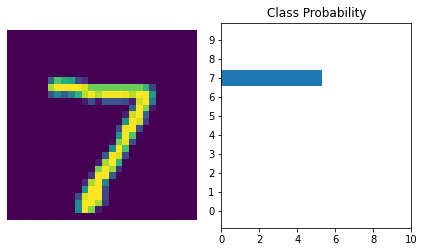

In [26]:
images, labels = next (iter (testloader))

# Turn off gradients to speed up this part
with torch.no_grad():
    logps = net (images.cuda())

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp (logps)
probab = list (ps.cpu().numpy()[0])
print ("Predicted Digit =", probab.index (max (probab)))
view_classify (images[0], ps[0])

In [27]:
layer_dict = net.state_dict ()